# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [25]:
!pip install ucimlrepo

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [ ]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']
print(X.keys())

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Write and Run Your Own Code

In [ ]:
#Library declarations moved to top of file
#import matplotlib.pyplot as plt
#import numpy as np

In [ ]:
# Task 1: Implement Linear Regression
# Hint: You can use np.linalg.lstsq() or implement the normal equation: w = (X^T X)^{-1} X^T y

def add_intercept(X):
    X = np.asarray(X, dtype=float)
    ones = np.ones((X.shape[0], 1), dtype=float)
    return np.hstack((ones, X))

def predict_linear(X, w):
    X = np.asarray(X, dtype=float)
    w = np.asarray(w, dtype=float).reshape(-1)

    intercept = w[0]
    weights = w[1:]                      # length d
    return intercept + X.dot(weights) 

# Main functions
def linear_regression(X, y):
    """
    Linear regression via least-squares.

    Parameters
    ----------
    X : (n_samples, n_features) numpy array
    y : (n_samples,) numpy array

    Returns
    -------
    coefficients : (n_features + 1,) numpy array
        Includes intercept as coefficients[0].
    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1)

    Xb = add_intercept(X)                # (n, d+1)
    w, _, _, _ = np.linalg.lstsq(Xb, y, rcond=None)  # (d+1,)
    return w

def compute_error(X, y, w):
    """
    Compute RMSE on (X, y).

    Returns
    -------
    rmse : float
    """
    y = np.asarray(y, dtype=float).reshape(-1)
    y_hat = predict_linear(X, w)
    return float(np.sqrt(np.mean((y - y_hat) ** 2)))


## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [34]:
# Create feature matrix with 'alcohol' and 'density'
X_2features = np.vstack((X['alcohol'], X['density'])).T

# TODO: Train model and compute error
model_2 = linear_regression(X_2features, y)
error_2 = compute_error(X_2features, y, model_2)
print(f"Error with 2 features: {error_2:.4f}")


Error with 2 features: 0.1686


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [35]:
# TODO: Try each remaining feature and find the best 3rd feature
# for key in X.keys():
#     if key not in ['alcohol', 'density']:
#         X_new = np.vstack((X['alcohol'], X['density'], X[key])).T
#         # Train model and compute error
#         # Print results

# Try each remaining feature and find the best 3rd feature (lowest RMSE)
base_keys = ['alcohol', 'density']
candidate_keys = [k for k in X.keys() if k not in base_keys]

# Initialize variables to track the 3rdbest feature and its RMSE
best_key_3 = None
best_rmse_3 = float('inf')
best_model_3 = None

# Iterate through candidate features to find the best one
for key in candidate_keys:
    X_new = np.vstack((X['alcohol'], X['density'], X[key])).T
    w = linear_regression(X_new, y)
    rmse = compute_error(X_new, y, w)
    if rmse < best_rmse_3:
        best_rmse_3 = rmse
        best_key_3 = key
        best_model_3 = w

# Print the best feature and its RMSE
print(f"Best 3rd feature: {best_key_3}  | RMSE: {best_rmse_3:.6f}")

# Build the best 3-feature matrix for later steps
X_3features = np.vstack((X['alcohol'], X['density'], X[best_key_3])).T
model_3 = best_model_3


Best 3rd feature: volatile_acidity  | RMSE: 0.132040


## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [36]:
# TODO: Find the best 4th feature


# TODO: Train full model with all features
# X_all = np.vstack([X[key] for key in X.keys()]).T
# model_full = linear_regression(X_all, y)

# Find the best 4th feature by extending the method used for the 3rd feature
used_keys = ['alcohol', 'density', best_key_3]
candidate_keys_4 = [k for k in X.keys() if k not in used_keys]

# Initialize variables to track the best 4th feature and its RMSE
best_key_4 = None
best_rmse_4 = float('inf')
best_model_4 = None

# Iterate through candidate features to find the best one
for key in candidate_keys_4:
    X_new = np.vstack((X['alcohol'], X['density'], X[best_key_3], X[key])).T
    w = linear_regression(X_new, y)
    rmse = compute_error(X_new, y, w)
    if rmse < best_rmse_4:
        best_rmse_4 = rmse
        best_key_4 = key
        best_model_4 = w

#  Print the best feature and its RMSE
print(f"Best 4th feature: {best_key_4}  | RMSE: {best_rmse_4:.6f}")

X_4features = np.vstack((X['alcohol'], X['density'], X[best_key_3], X[best_key_4])).T
model_4 = best_model_4

# Train full model with all features
feature_names_all = list(X.keys())
X_all = np.vstack([X[k] for k in feature_names_all]).T
model_full = linear_regression(X_all, y)
error_full = compute_error(X_all, y, model_full)

# Print final results
print(f"RMSE with 4 features: {best_rmse_4:.6f}")
print(f"RMSE with ALL {len(feature_names_all)} features: {error_full:.6f}")

Best 4th feature: fixed_acidity  | RMSE: 0.124159
RMSE with 4 features: 0.124159
RMSE with ALL 10 features: 0.105519


## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


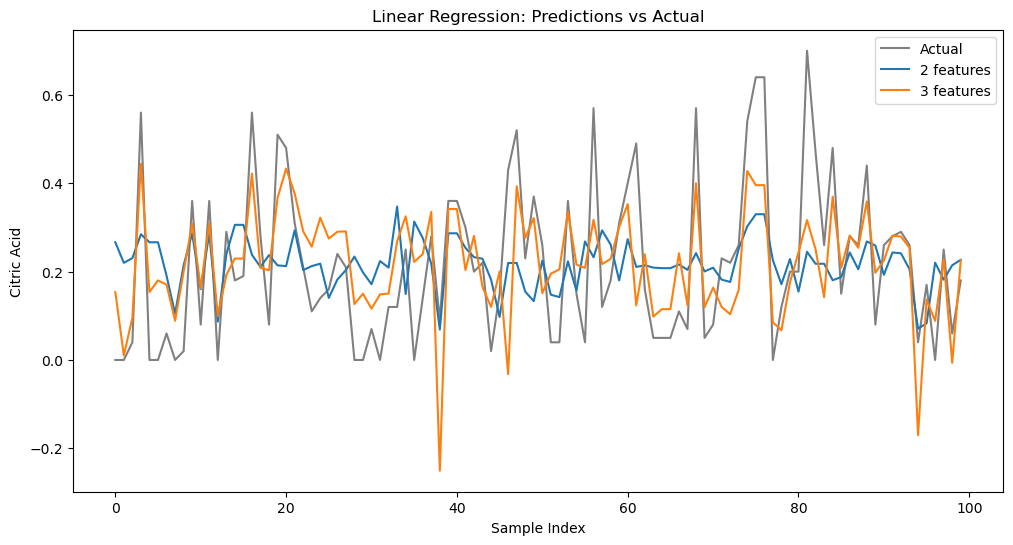

In [37]:
# TODO: Create comparison plots
# Example:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual', color='gray')

plt.plot(predict_linear(X_2features, model_2), label='2 features')
plt.plot(predict_linear(X_3features, model_3), label='3 features')

plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.show()

### That Output is hard to look at. Let's make changes
####    1. Reorder x axis from lowest to highest using the actual citric acid level. 
####    2. Make actual citric acid a bold color so it stands out

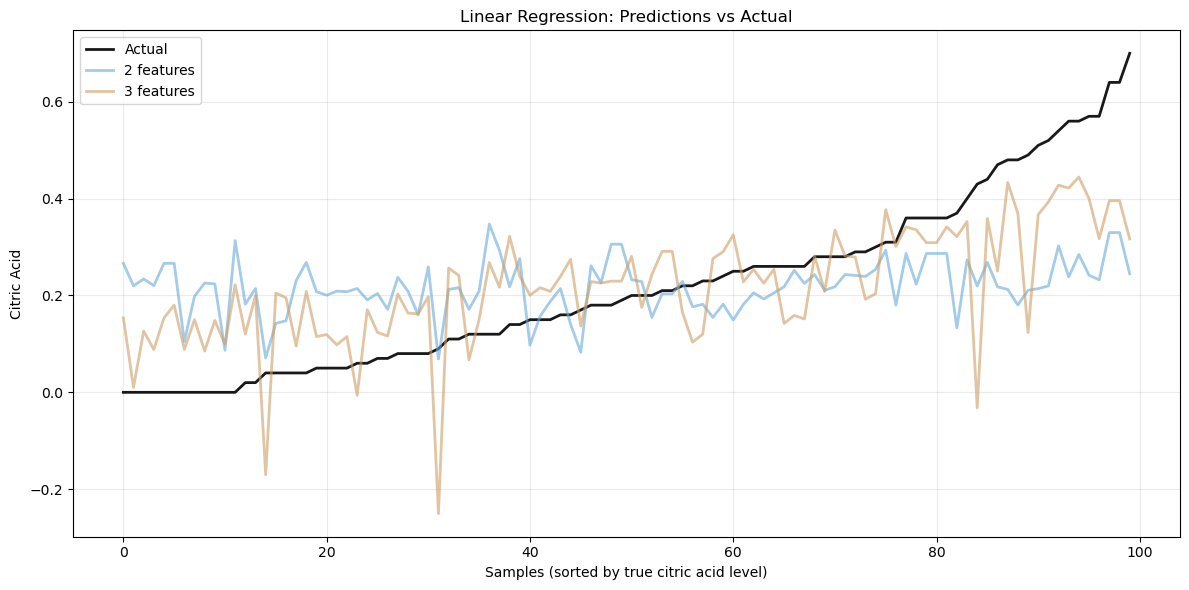

In [40]:
# regeb pred
y_actual = np.asarray(y).ravel()
y_pred2  = predict_linear(X_2features, model_2)
y_pred3  = predict_linear(X_3features, model_3)
#y_predF = predict_linear(X_all, model_full)   

# sort by actual y
idx = np.argsort(y_actual)

plt.figure(figsize=(12, 6))
plt.plot(y_actual[idx], label='Actual', linewidth=2, alpha=0.9, color='#000000')
plt.plot(y_pred2[idx],  label='2 features', linewidth=2, alpha=0.6, color='#68a9d8')
plt.plot(y_pred3[idx],  label='3 features', linewidth=2, alpha=0.6, color="#ce9d64")
#plt.plot(y_predF, label='All features', linewidth=2, alpha=0.6, color="#b37ed1")

plt.legend()
plt.xlabel('Samples (sorted by true citric acid level)')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig('2aFig.png', dpi=500)
plt.show()


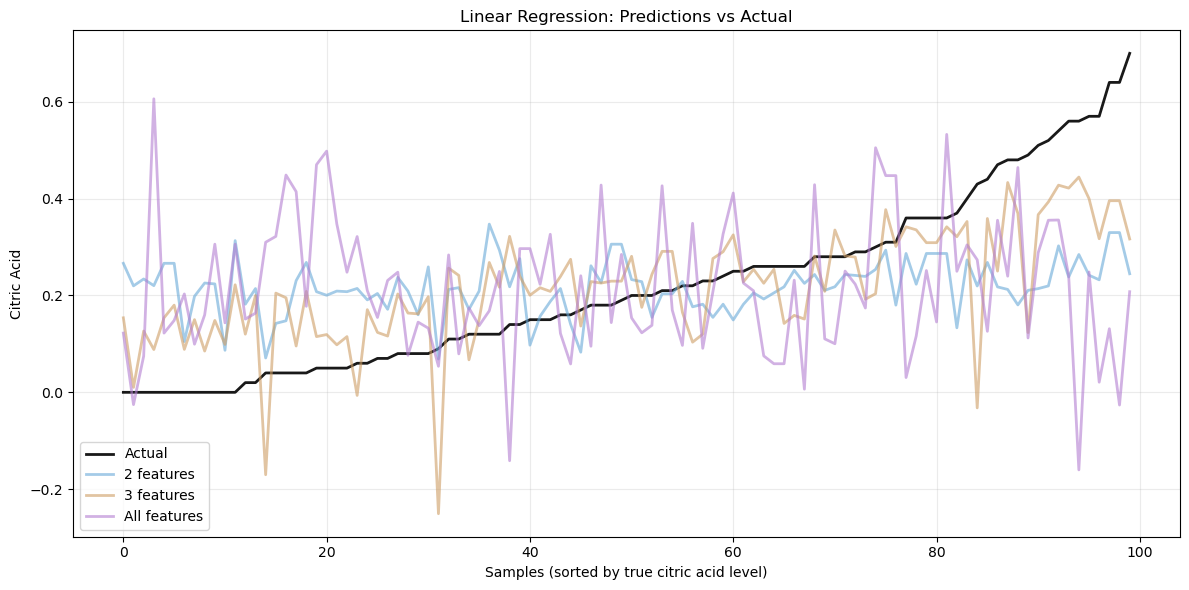

In [41]:
# regeb pred
y_actual = np.asarray(y).ravel()
y_pred2  = predict_linear(X_2features, model_2)
y_pred3  = predict_linear(X_3features, model_3)
y_predF = predict_linear(X_all, model_full)   

# sort by actual y
idx = np.argsort(y_actual)

plt.figure(figsize=(12, 6))
plt.plot(y_actual[idx], label='Actual', linewidth=2, alpha=0.9, color='#000000')
plt.plot(y_pred2[idx],  label='2 features', linewidth=2, alpha=0.6, color='#68a9d8')
plt.plot(y_pred3[idx],  label='3 features', linewidth=2, alpha=0.6, color="#ce9d64")
plt.plot(y_predF, label='All features', linewidth=2, alpha=0.6, color="#b37ed1")

plt.legend()
plt.xlabel('Samples (sorted by true citric acid level)')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig('2aFig_all.png', dpi=500)
plt.show()


## Summary and Discussion

### Results Table
| Model | Features | Error |
|-------|----------|-------|
| Model 1 | alcohol, density | 0.1686 |
| Model 2 | alcohol, density, volatile_acidity | 0.132040 |
| Model 3 | alcohol, density, volatile_acidity, fixed_acidity | 0.124159 |
| Full Model | all features | 0.105519 |

### Discussion
*Write your analysis here:*
- Which features are most important for predicting citric acid?
    - Alcohol and density where selected at the start as per instruction. Then for Task 3 we needed to implement a method to find the 3rd best candidate. This was done by searching through the other variables and testing the RMSE. Then the variable with the lowest RMSE is taken. Low RMSE = true to target values. Then we found fixed_acidity to be the 4th best varaible. 
- Does adding more features always improve the model?
    - Typically, starting from one feature then iteratively adding the best feature improves the model greatly. Eventually it will hit a limit. There are many python librares that streamline this testing. In datasets with many features, adding all features will increase computational costs with little improvement to the overall model. 
- What did you learn from this exercise?
    - I have experience with applying Data Analytic libraries to datasets, especially ML methods. However, I have not dove into the mechanism and theory behind these libraries/functions. This course is very interesting. I feel I learn more because I can visualize how something we are working on (i.e using RMSE for feature selection) fits into the overall process. In this case preprocessing.
